In [74]:
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/aasthaprajapati/Desktop/MOCK_DATA (1).csv')

### Data Preprocessing

In [75]:
df.head()

,first_name,math,science,english,total,pass_?
0,Fransisco,70,82,68.0,220.0,true
1,Frederique,66,90,26.7,182.7,true
2,Obediah,1,35,10.9,46.9,false
3,Mei,72,3,9.8,84.8,false
4,Loretta,91,75,36.6,202.6,true


In [76]:
df['total'].fillna(value=df['total'].mean(), inplace = True)

In [77]:
x = df2.iloc[:,0:-2]
y = df2.iloc[:,-2:]

In [78]:
x.head()

,first_name,math,science,english
0,Fransisco,70,82,68.0
1,Frederique,66,90,26.7
2,Obediah,1,35,10.9
3,Mei,72,3,9.8
4,Loretta,91,75,36.6


In [79]:
y.head()

,total,pass_?
0,220.0,2
1,182.7,2
2,46.9,1
3,84.8,1
4,202.6,2


In [80]:
df['pass_?']=df['pass_?'].astype('category')

In [81]:
df['pass_enc']=df['pass_?'].cat.codes

In [82]:
df['pass_?'] = df['pass_enc']

In [83]:
df2 = df.drop('pass_enc', axis=1)

In [84]:
df2.head()

,first_name,math,science,english,total,pass_?
0,Fransisco,70,82,68.0,220.0,2
1,Frederique,66,90,26.7,182.7,2
2,Obediah,1,35,10.9,46.9,1
3,Mei,72,3,9.8,84.8,1
4,Loretta,91,75,36.6,202.6,2


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.45,random_state=1)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
x_train.iloc[:,1:] = scaler.fit_transform(x_train.iloc[:,1:])
x_test.iloc[:,1:] = scaler.fit_transform(x_test.iloc[:,1:])

y_train.iloc[:,:] = scaler.fit_transform(y_train.iloc[:,:])
y_test.iloc[:,:] = scaler.fit_transform(y_test.iloc[:,:])

In [89]:
x_train.head()

,first_name,math,science,english
41,Tabbie,0.049861,1.272815,-0.087312
45,Ulises,-1.451893,1.527378,-0.779055
91,Cherrita,-0.505135,-1.054618,-0.047264
26,Paloma,1.486321,-0.981886,1.019478
98,Raina,0.572210,-0.945520,0.513413


In [90]:
y_test.head()

,total,pass_?
80,0.853450,0.442326
84,-0.300367,0.442326
33,-1.468109,-1.769303
81,-1.187612,-1.769303
93,1.394550,0.442326


In [91]:
df2['pass_?'].unique()

array([2, 1, 0], dtype=int8)

### Simple Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [99]:
df2

,first_name,math,science,english,total,pass_?
0,Fransisco,70,82,68.0,220.0,2
1,Frederique,66,90,26.7,182.7,2
2,Obediah,1,35,10.9,46.9,1
3,Mei,72,3,9.8,84.8,1
4,Loretta,91,75,36.6,202.6,2
...,...,...,...,...,...,...
95,Farrah,73,8,87.9,168.9,2
96,Hildegaard,87,77,80.5,244.5,2
97,Bettye,19,25,97.0,141.0,2
98,Raina,65,27,63.5,155.5,2


'math'

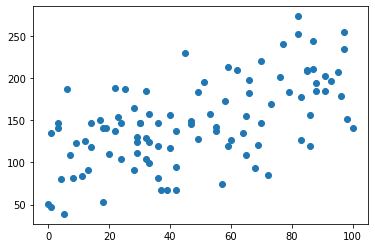

In [100]:
%matplotlib inline

plt.scatter(df.math, df['total'])
plt.xlabel

In [102]:
reg = LinearRegression() 

In [111]:
reg.fit(df[['math']], df['total'])

LinearRegression()

In [113]:
reg.intercept_

99.10528613006183

In [114]:
reg.coef_

array([1.00150265])

In [117]:
reg.predict([[100]]) ##passing a 2D array and not 1D

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([199.25555149])

In [118]:
reg.predict([[50]])

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.18041881])

In [121]:
p = reg.predict(df[['math']]) ## creating an array of predictions per x value

In [124]:
p.dtype

dtype('float64')

In [125]:
df['predicted_total'] = p

In [126]:
df

,first_name,math,science,english,total,pass_?,pass_enc,predicted_total
0,Fransisco,70,82,68.0,220.0,2,2,169.210472
1,Frederique,66,90,26.7,182.7,2,2,165.204461
2,Obediah,1,35,10.9,46.9,1,1,100.106789
3,Mei,72,3,9.8,84.8,1,1,171.213477
4,Loretta,91,75,36.6,202.6,2,2,190.242028
...,...,...,...,...,...,...,...,...
95,Farrah,73,8,87.9,168.9,2,2,172.214980
96,Hildegaard,87,77,80.5,244.5,2,2,186.236017
97,Bettye,19,25,97.0,141.0,2,2,118.133837
98,Raina,65,27,63.5,155.5,2,2,164.202959


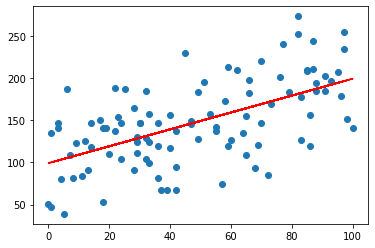

In [140]:
%matplotlib inline

plt.scatter(df.math, df['total'])
plt.plot(df.math, reg.predict(df[['math']]), color ="red") ## x values are values on x axis but y values are taken from the prediction array p

In [141]:
reg.predict([[80
             ]])

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([179.22549841])

In [142]:
df.math

0     70
1     66
2      1
3     72
4     91
      ..
95    73
96    87
97    19
98    65
99    22
Name: math, Length: 100, dtype: int64

In [144]:
reg.predict(df[['math']])

array([169.21047188, 165.20446126, 100.10678878, 171.21347719,
       190.2420276 , 158.19394269, 135.15938166, 119.1353392 ,
       102.10979409, 159.19544534, 199.25555149, 124.14285247,
       110.12181532, 112.12482063, 132.1548737 , 128.14886308,
       105.11430205, 131.15337104, 139.16539227, 161.19845065,
       106.1158047 , 121.13834451, 108.11881001, 178.22399576,
       169.21047188, 131.15337104, 192.24503291, 157.19244004,
       146.17591085, 196.25104352, 129.15036574, 158.19394269,
       148.17891615, 141.16839758, 165.20446126, 116.13083124,
       187.23751964, 196.25104352, 154.18793208, 138.16388962,
       141.16839758, 148.17891615, 127.14736043, 195.24954087,
       152.18492677, 102.10979409, 136.16088431, 184.23301168,
       132.1548737 , 190.2420276 , 146.17591085, 185.23451434,
       128.14886308, 122.13984716, 127.14736043, 113.12632328,
       141.16839758, 175.2194878 , 181.22850372, 128.14886308,
       176.22099045, 129.15036574, 167.20746657, 100.10

In [145]:
reg.predict([[66]]) ## confirming from the displayed array if the prdiction matches with the x value.

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([165.20446126])

In [146]:
p

array([169.21047188, 165.20446126, 100.10678878, 171.21347719,
       190.2420276 , 158.19394269, 135.15938166, 119.1353392 ,
       102.10979409, 159.19544534, 199.25555149, 124.14285247,
       110.12181532, 112.12482063, 132.1548737 , 128.14886308,
       105.11430205, 131.15337104, 139.16539227, 161.19845065,
       106.1158047 , 121.13834451, 108.11881001, 178.22399576,
       169.21047188, 131.15337104, 192.24503291, 157.19244004,
       146.17591085, 196.25104352, 129.15036574, 158.19394269,
       148.17891615, 141.16839758, 165.20446126, 116.13083124,
       187.23751964, 196.25104352, 154.18793208, 138.16388962,
       141.16839758, 148.17891615, 127.14736043, 195.24954087,
       152.18492677, 102.10979409, 136.16088431, 184.23301168,
       132.1548737 , 190.2420276 , 146.17591085, 185.23451434,
       128.14886308, 122.13984716, 127.14736043, 113.12632328,
       141.16839758, 175.2194878 , 181.22850372, 128.14886308,
       176.22099045, 129.15036574, 167.20746657, 100.10